In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [3]:
data = pd.read_csv('KDDTrain+_2.csv')

data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"class"]

data = pd.read_csv('KDDTrain+_2.csv',header=None,names=columns)
attacks = {'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'mailbomb': 'dos', 'apache2': 'dos', 'ipsweep': 'probe', 'mscan': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'saint': 'probe', 'satan': 'probe', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'warezmaster': 'r2l', 'warezclient': 'r2l', 'spy': 'r2l', 'sendmail': 'r2l', 'xlock': 'r2l', 'snmpguess': 'r2l', 'named': 'r2l', 'xsnoop': 'r2l', 'snmpgetattack': 'r2l', 'worm': 'r2l', 'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'xterm': 'u2r', 'ps': 'u2r', 'httptunnel': 'u2r', 'sqlattack': 'u2r', 'normal': 'normal'}

label = data[data.columns[len(data.columns)-1]]
data = data.drop('class' , axis=1)
label = label.map(attacks) 
attack_label = {'normal' : 0 , 'dos' : 1 , 'probe' : 2 , 'r2l' : 3 , 'u2r' : 4} 
label = label.map(attack_label)

text_columns = data.select_dtypes(exclude='number').columns.tolist()
for column in text_columns:
    _list = data[column].unique().tolist()
    _dict = {}
    for x in range(len(_list)):
        _dict[_list[x]] = x

    print(_dict)
    data[column] = data[column].map(_dict)
data.head()

{'tcp': 0, 'udp': 1, 'icmp': 2}
{'ftp_data': 0, 'other': 1, 'private': 2, 'http': 3, 'remote_job': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}
{'SF': 0, 'S0': 1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,1,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,2,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,3,0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,3,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
data1 = pd.read_csv('KDDTrain+_2.csv',header=None,names=columns)

In [16]:
data1['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

# Recursive Feature Elimination (RFE)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [6]:
# Perform Recursive Feature Elimination

estimator = LinearRegression()
selector = RFE(estimator , n_features_to_select=10)
X_new = selector.fit_transform(data,label)

In [10]:
# Get the selected feature indices

selected_indeces = selector.get_support(indices=True)
selected_indeces

array([ 6, 13, 14, 21, 27, 28, 34, 35, 36, 38], dtype=int64)

In [20]:
for i in selected_indeces:
    print(data.columns[i])

land
root_shell
su_attempted
is_guest_login
srv_rerror_rate
same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_srv_serror_rate


In [21]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,1,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,2,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,3,0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,3,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,2,1,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,1,2,0,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,0,15,0,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,35,1,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [12]:
# Get the feature rankings

rankings = selector.ranking_
rankings

array([29,  5, 24, 19, 30, 31,  1,  9, 11, 16,  2,  7, 22,  1,  1, 23, 21,
        8, 20, 32,  3,  1, 27, 28, 13,  6, 15,  1,  1, 17, 14, 26, 25, 18,
        1,  1,  1, 12,  1, 10,  4])

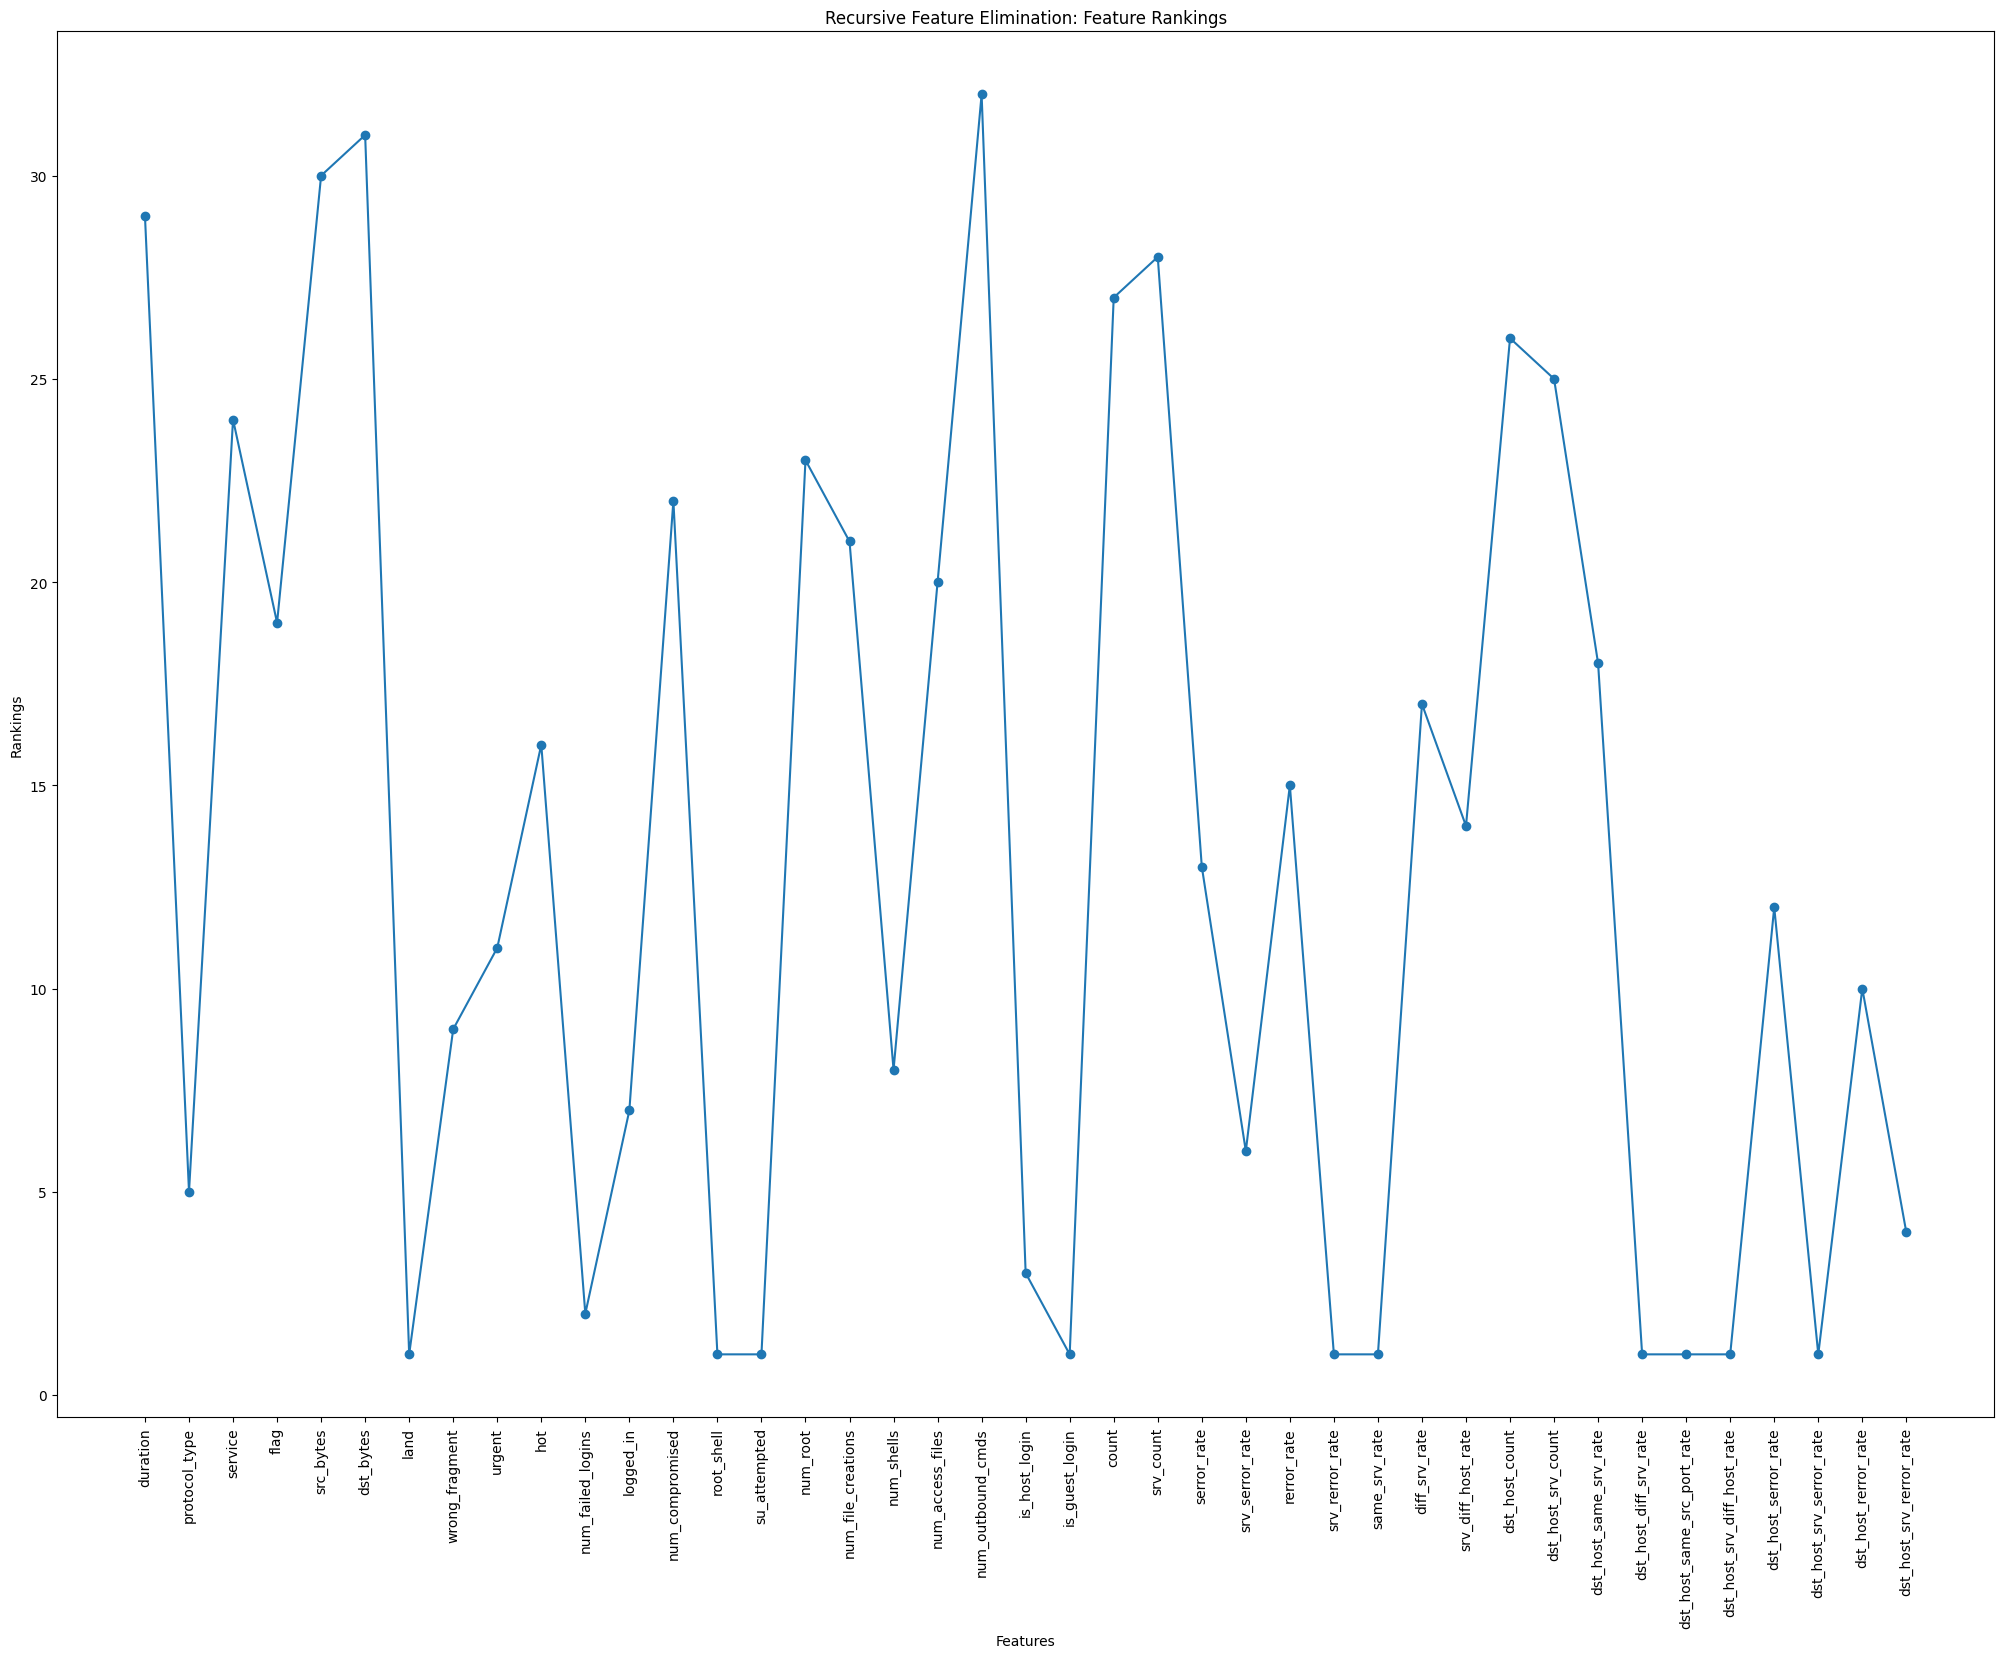

In [22]:
# Plot the feature rankings

plt.figure(figsize=(25,18))
plt.plot(range(1, len(rankings) + 1), rankings, marker='o')
plt.xticks(range(1, len(rankings) + 1), data.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Rankings')
plt.title('Recursive Feature Elimination: Feature Rankings')
plt.show()

# Univariate Feature Selection

###### Univariate feature selection evaluates each feature individually based on statistical tests to measure the correlation between each feature and the target variable. 

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression


In [7]:
# Perform univariate feature selection

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(data, label)

In [9]:
# Get the selected feature indices

selected_indices = selector.get_support(indices=True)
selected_features = data.columns[selected_indices]
print(selected_features,selected_indices)


Index(['flag', 'logged_in', 'count', 'serror_rate', 'same_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object') [ 3 11 22 24 28 32 33 34 37 38]


In [30]:
scores = selector.scores_
scores

array([2.14668173e+03, 3.66626392e+03, 4.39490362e+03, 2.74798494e+04,
       2.12321155e+01, 9.42754703e+00, 1.09151517e+00, 3.79368990e+02,
       1.95642934e+00, 5.35892467e+02, 6.73708138e+01, 6.25552563e+04,
       1.02106561e+01, 7.58164166e+00, 4.78345077e+01, 1.26490370e+01,
       2.60705163e+01, 3.41701744e+00, 1.15252189e+02, 0.00000000e+00,
       6.86211421e-01, 1.18067214e+02, 2.23735863e+04, 1.90450386e+02,
       2.14762420e+04, 2.10866266e+04, 1.32659695e+04, 1.33841293e+04,
       4.44879742e+04, 1.09095708e+04, 1.37746320e+01, 5.03809491e+03,
       8.04295056e+04, 4.81414343e+04, 2.27792110e+04, 1.42807019e+04,
       7.67533531e+03, 2.15384754e+04, 2.18940544e+04, 1.19013163e+04,
       1.34146017e+04])

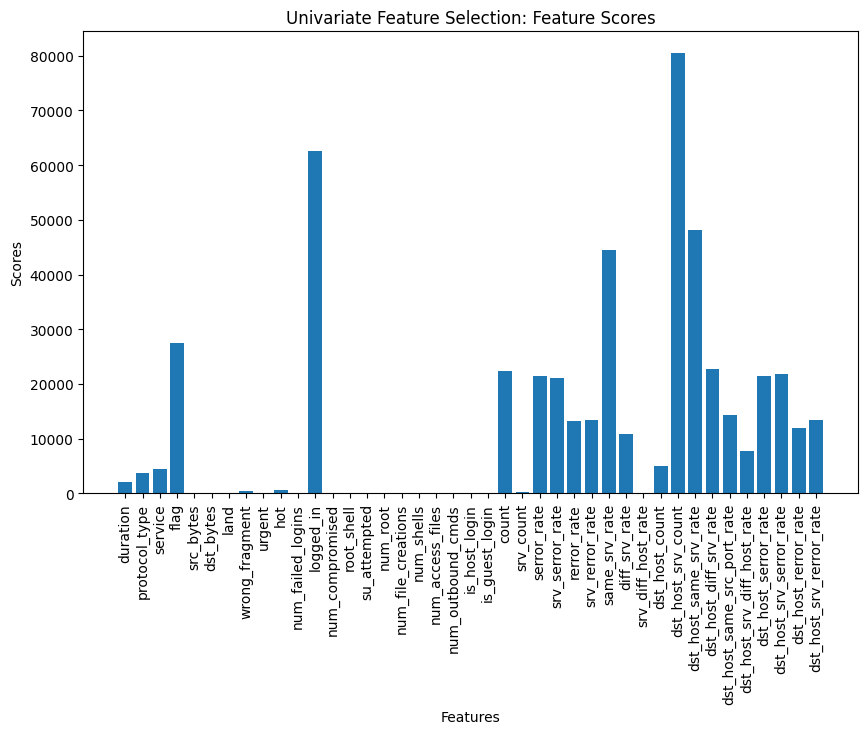

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(data.columns)), scores, tick_label=data.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Feature Scores')
plt.show()

# L1 Regularisation (Lasso)

###### L1 regularisation, also known as Lasso regularisation, applies a penalty term to the linear regression model, encouraging sparse feature weights. This results in some feature weights being driven to zero, effectively selecting only the most relevant features.

In [33]:
from sklearn.linear_model import Lasso

In [36]:
# Perform L1 regularisation (Lasso)
lasso = Lasso(alpha=0.1)
lasso.fit(data, label)

Lasso(alpha=0.1)

In [38]:
# Get the non-zero feature coefficients
nonzero_coefs = lasso.coef_
selected_indices = nonzero_coefs != 0
selected_features = data.columns[selected_indices]
nonzero_coefs = nonzero_coefs[selected_indices]
selected_features

Index(['duration', 'service', 'src_bytes', 'dst_bytes', 'num_root', 'count',
       'srv_count', 'dst_host_count', 'dst_host_srv_count'],
      dtype='object')

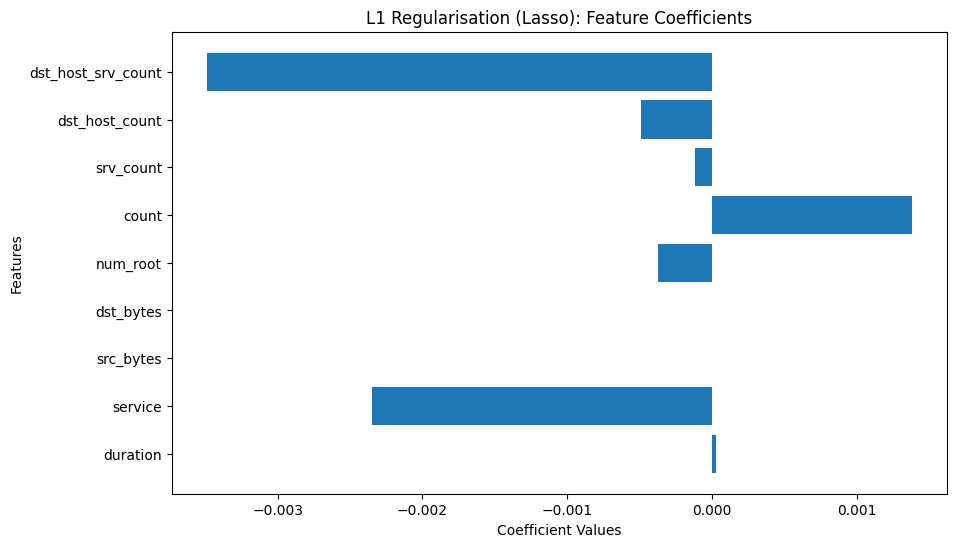

In [39]:
# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(nonzero_coefs)), nonzero_coefs, tick_label=selected_features)
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('L1 Regularisation (Lasso): Feature Coefficients')
plt.show()

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Perform feature selection using Random Forest
forest = RandomForestRegressor(n_estimators=100)
forest.fit(data, label)

RandomForestRegressor()

In [44]:
# Get feature importances
importances = forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Select the top k features
k = 10
selected_features = data.columns[sorted_indices[:k]]
top_importances = importances[sorted_indices[:k]]
selected_features

Index(['src_bytes', 'dst_host_same_src_port_rate', 'service',
       'dst_host_diff_srv_rate', 'dst_bytes', 'count',
       'dst_host_same_srv_rate', 'hot', 'dst_host_srv_diff_host_rate',
       'protocol_type'],
      dtype='object')

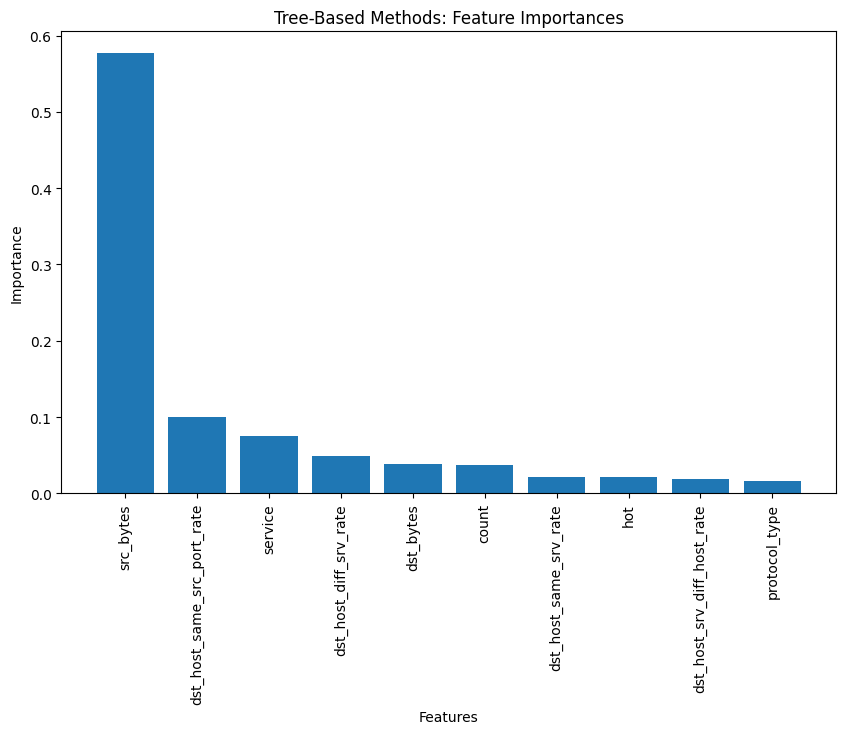

In [45]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances, tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Tree-Based Methods: Feature Importances')
plt.show()

# Principal Component Analysis (PCA)

In [47]:
from sklearn.decomposition import PCA

In [57]:
# Perform PCA
pca = PCA(n_components=10)
X_new = pca.fit_transform(data)

In [58]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.80620901e-01, 3.19378965e-01, 1.33150126e-07, 4.24214319e-10,
       2.02392046e-10, 1.24392314e-10, 4.39717019e-11, 2.30119751e-11,
       2.66545214e-12, 8.97099506e-14])

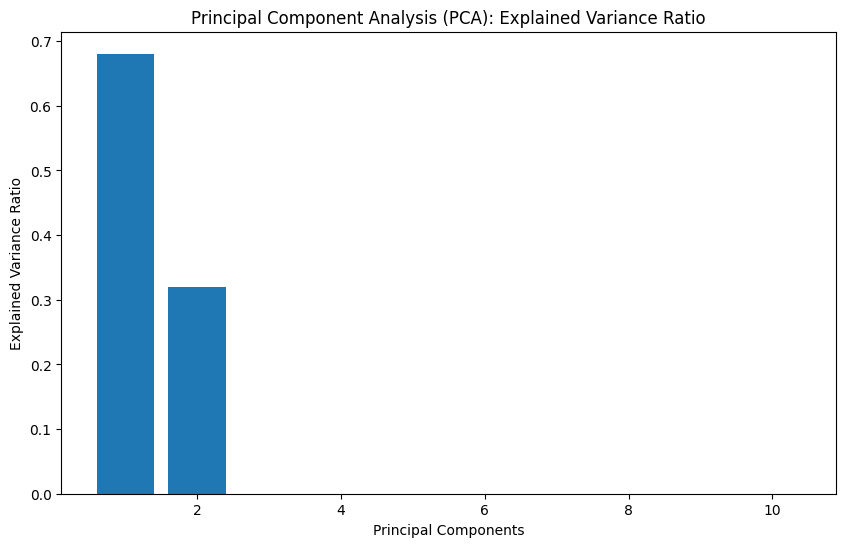

In [59]:
#Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis (PCA): Explained Variance Ratio')
plt.show()

In [56]:
loadings = pca.components_
loadings

array([[ 3.13869088e-05, -3.29916348e-10,  7.69789227e-09,
         6.12754286e-09,  9.99999965e-01,  2.63141536e-04,
        -2.62445072e-13, -2.99180600e-11, -1.43839880e-13,
         1.07998805e-10, -1.60419764e-12, -2.79330128e-10,
        -3.48119748e-10, -1.69420934e-12, -1.42559794e-12,
        -3.87517865e-10, -1.47365550e-11, -5.06965338e-13,
        -5.23715306e-12, -0.00000000e+00, -1.04542560e-14,
        -1.22055170e-11, -1.00511209e-07, -3.45550195e-08,
        -2.45568775e-10, -2.61857539e-10,  7.52390586e-10,
         7.70610260e-10,  2.92020448e-10, -1.32790056e-11,
        -1.15451993e-10, -9.78558461e-08, -1.29389777e-07,
        -5.02661289e-10,  2.90326484e-11,  2.28150328e-11,
        -3.17366508e-11, -3.41205698e-10, -2.57938446e-10,
        -7.65646899e-11,  6.77591984e-10],
       [ 2.25722343e-05, -3.05878085e-10, -9.69106177e-09,
         2.40897007e-09, -2.63142244e-04,  9.99999965e-01,
        -2.42595837e-13, -2.77335211e-11,  8.86769132e-13,
        -1.83